In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [5]:
df = pd.read_csv("F:\Bootcamp\project_break_2\Project_Break_2\\vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
df[df["Year"].isna() & df["Publisher"].isna()].count()

Rank            22
Name            22
Platform        22
Year             0
Genre           22
Publisher        0
NA_Sales        22
EU_Sales        22
JP_Sales        22
Other_Sales     22
Global_Sales    22
dtype: int64

La cantidad de nulos no es altamente significativa y ademas no conviene usar datos sinteticos.

In [11]:
df.dropna(inplace = True)

In [12]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

primero visalizaremos cuales son las plataformas con mas impacto

In [21]:
df.Platform.value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [26]:
platfor_sales_series = df.groupby("Platform").Global_Sales.mean().sort_values(ascending = False)

In [27]:
print(platfor_sales_series)

Platform
GB      2.622887
NES     2.561939
GEN     1.050370
SNES    0.837029
PS4     0.827679
X360    0.785737
2600    0.746293
PS3     0.728029
Wii     0.705279
N64     0.690538
XOne    0.662254
PS      0.611766
PS2     0.579906
WiiU    0.572448
3DS     0.493527
GBA     0.388830
DS      0.384284
GC      0.363727
XB      0.313935
SCD     0.311667
DC      0.307115
PC      0.271535
PSP     0.243701
WS      0.236667
SAT     0.194162
PSV     0.150244
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: Global_Sales, dtype: float64


Text(0.5, 1.0, 'top 5 plataforms by total sales')

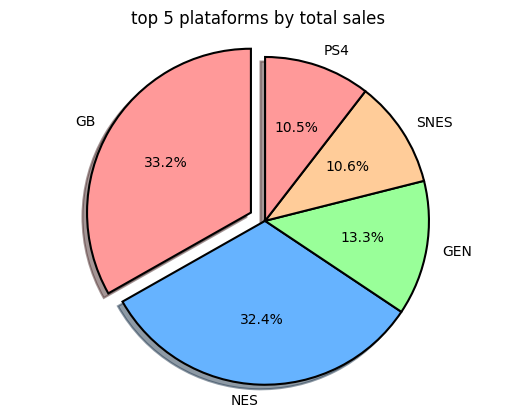

In [28]:

plt.pie(platfor_sales_series.head(),
        labels = platfor_sales_series.head().index,
        autopct= "%1.1f%%",
        colors = ["#ff9999","#66b3ff","#99ff99","#ffcc99"],
        explode = (0.1, 0, 0,0,0),
        shadow = True,
        startangle = 90,
        wedgeprops= {"edgecolor":"black", "linewidth" : 1.5 }) 
plt.axis("equal")
plt.title("top 5 plataforms by total sales")